In [6]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [2]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [6]:
#Data types found in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Insights

There are 13 columns containing ints and 1 column containing floats

Every column has 5000 non-null values, so it is safe to say there are no nulls in this dataset

In [7]:
#Statistical summary
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Insights

There is someone who has -3 years of experience

In [9]:
#Shape
data.shape

(5000, 14)

In [3]:
#Replace any values below 0 in the Experience column with 0
data['Experience'].replace(-3,0, inplace=True)
data['Experience'].replace(-2,0, inplace=True)
data['Experience'].replace(-1,0, inplace=True)

# EDA

In [21]:
# no of unique values in the dataset
data.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [23]:
# no of people with 0 mortgage
data['Mortgage'].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

### 3,462 people in this dataset have 0 mortgage

In [34]:
# no of people with 0 credit card spending
print(data['CCAvg'].value_counts().to_string())

0.30     241
1.00     231
0.20     204
2.00     188
0.80     187
0.10     183
0.40     179
1.50     178
0.70     169
0.50     163
1.70     158
1.80     152
1.40     136
2.20     130
1.30     128
0.60     118
2.80     110
2.50     107
0.90     106
0.00     106
1.90     106
1.60     101
2.10     100
2.40      92
2.60      87
1.10      84
1.20      66
2.70      58
2.30      58
2.90      54
3.00      53
3.30      45
3.80      43
3.40      39
2.67      36
4.00      33
4.50      29
3.90      27
3.60      27
4.30      26
6.00      26
3.70      25
4.70      24
3.20      22
4.10      22
4.90      22
3.10      20
6.50      18
5.00      18
5.40      18
0.67      18
2.33      18
1.67      18
4.40      17
5.20      16
3.50      15
6.90      14
7.00      14
6.10      14
4.60      14
7.20      13
5.70      13
7.40      13
6.30      13
7.50      12
8.00      12
4.20      11
6.33      10
6.80      10
8.10      10
7.30      10
0.75       9
1.75       9
6.67       9
4.33       9
7.60       9
6.70       9

### There are 106 people in this dataset with 0 credit card spending

In [39]:
#Value counts of all categorical columns
print(data['Education'].value_counts())
print(data['Personal Loan'].value_counts())
print(data['Securities Account'].value_counts())
print(data['CD Account'].value_counts())
print(data['Online'].value_counts())
print(data['CreditCard'].value_counts())

1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


## Univariate Analyses

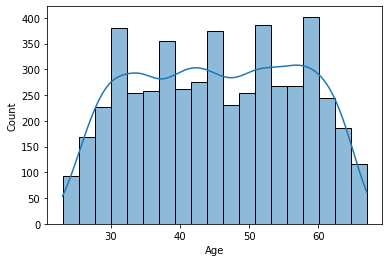

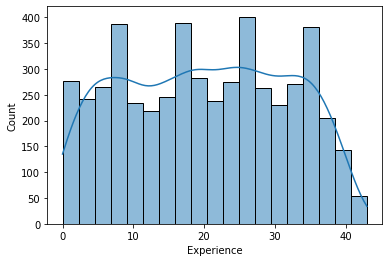

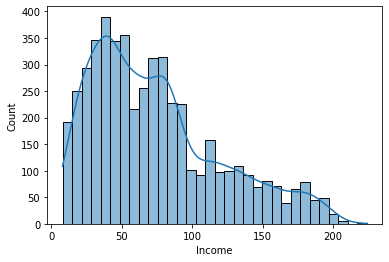

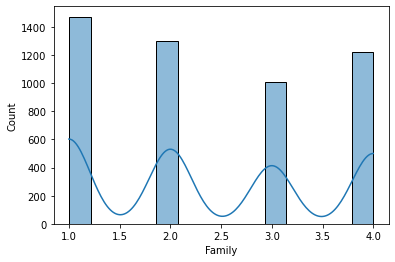

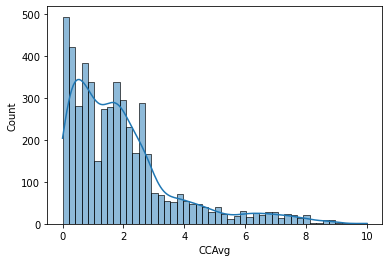

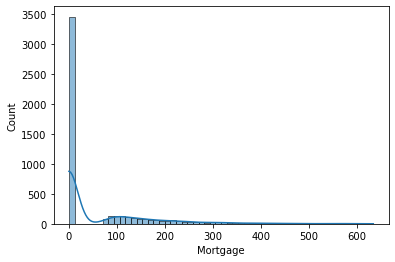

In [4]:
#Continuous variables
for i in ['Age','Experience','Income','Family','CCAvg','Mortgage']:
    sns.histplot(data[i], kde = True)
    plt.show()

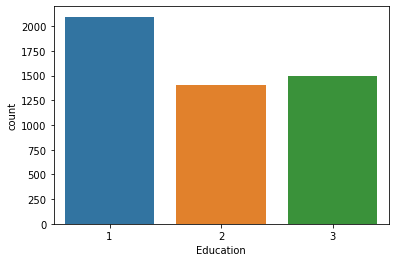

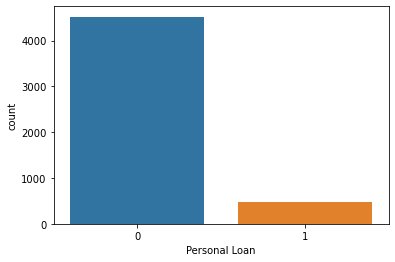

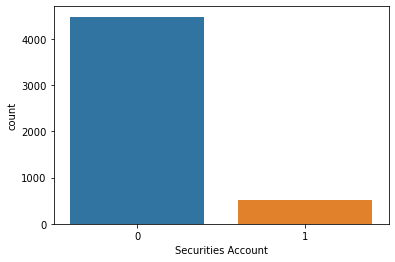

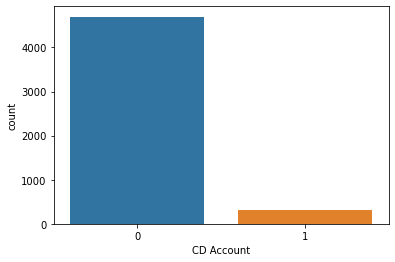

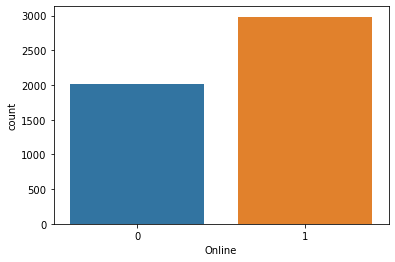

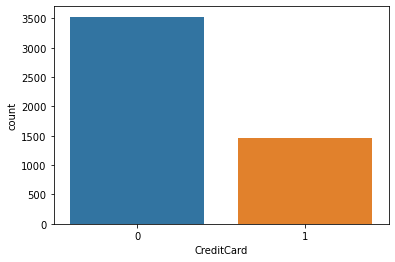

In [7]:
#Catgeorical
for i in ['Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']:
    sns.countplot(data[i])
    plt.show()

## Bivariate

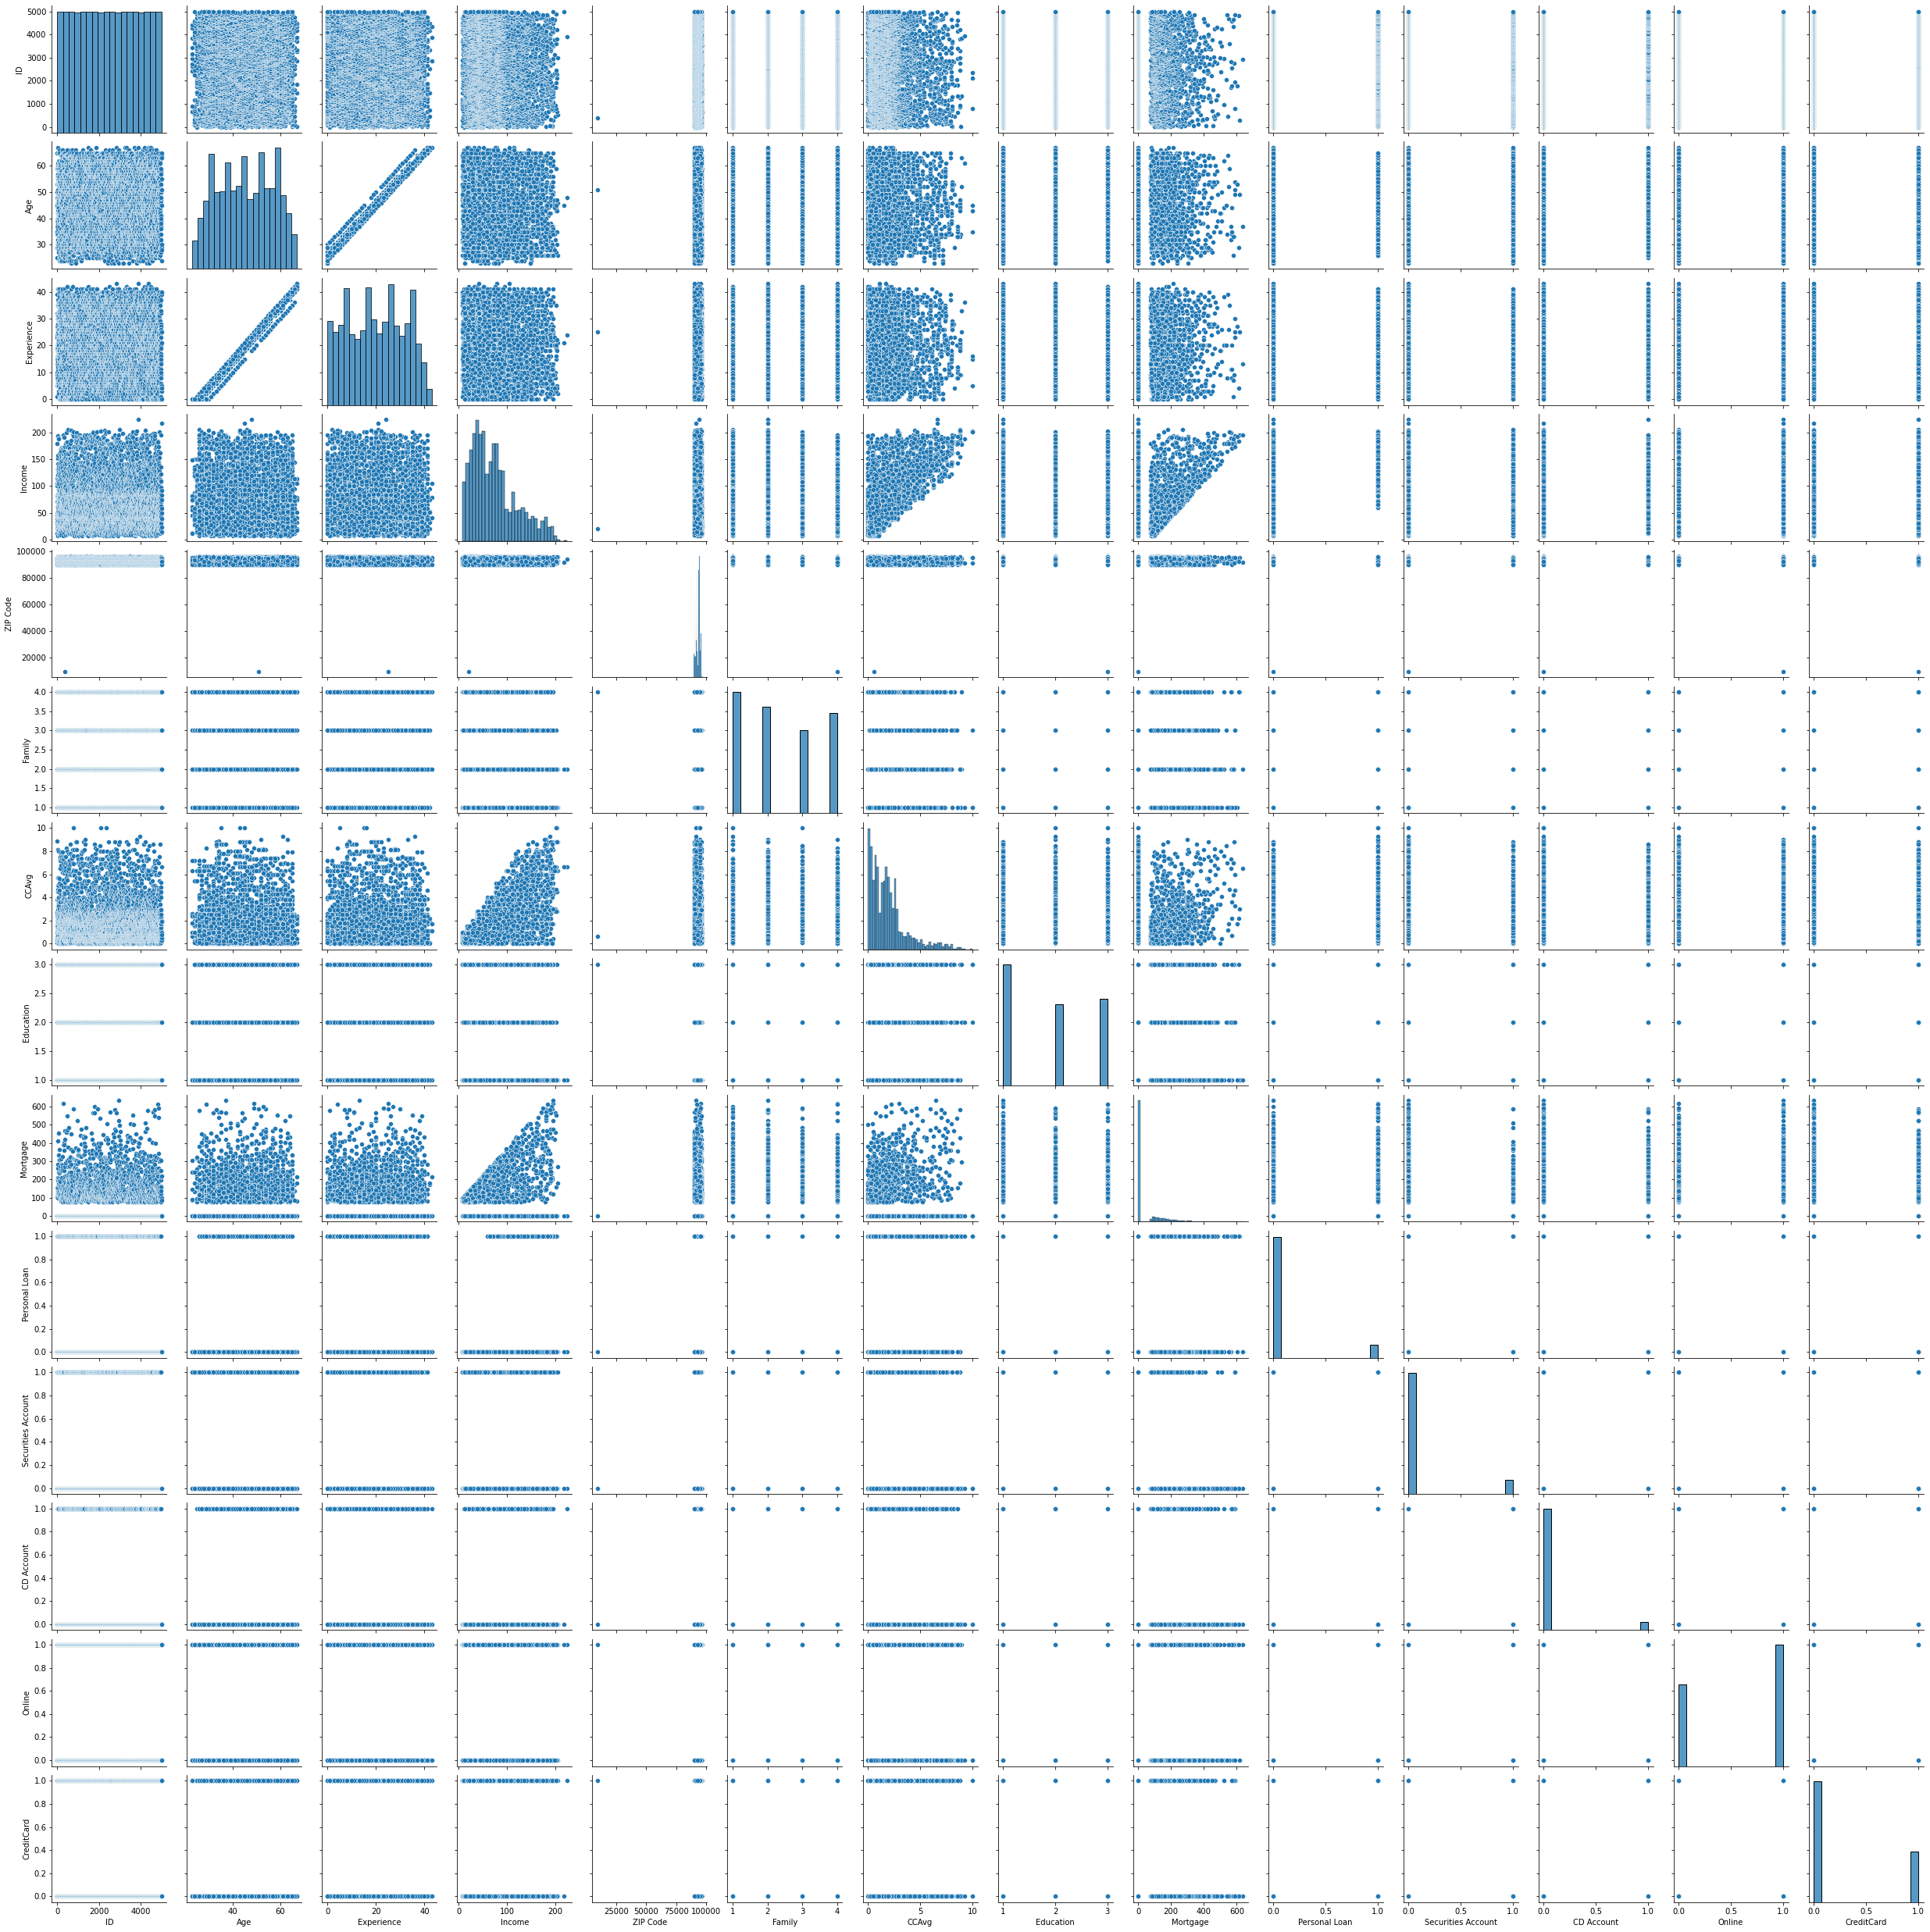

In [8]:
sns.pairplot(data, diag_kind='auto')
plt.show()

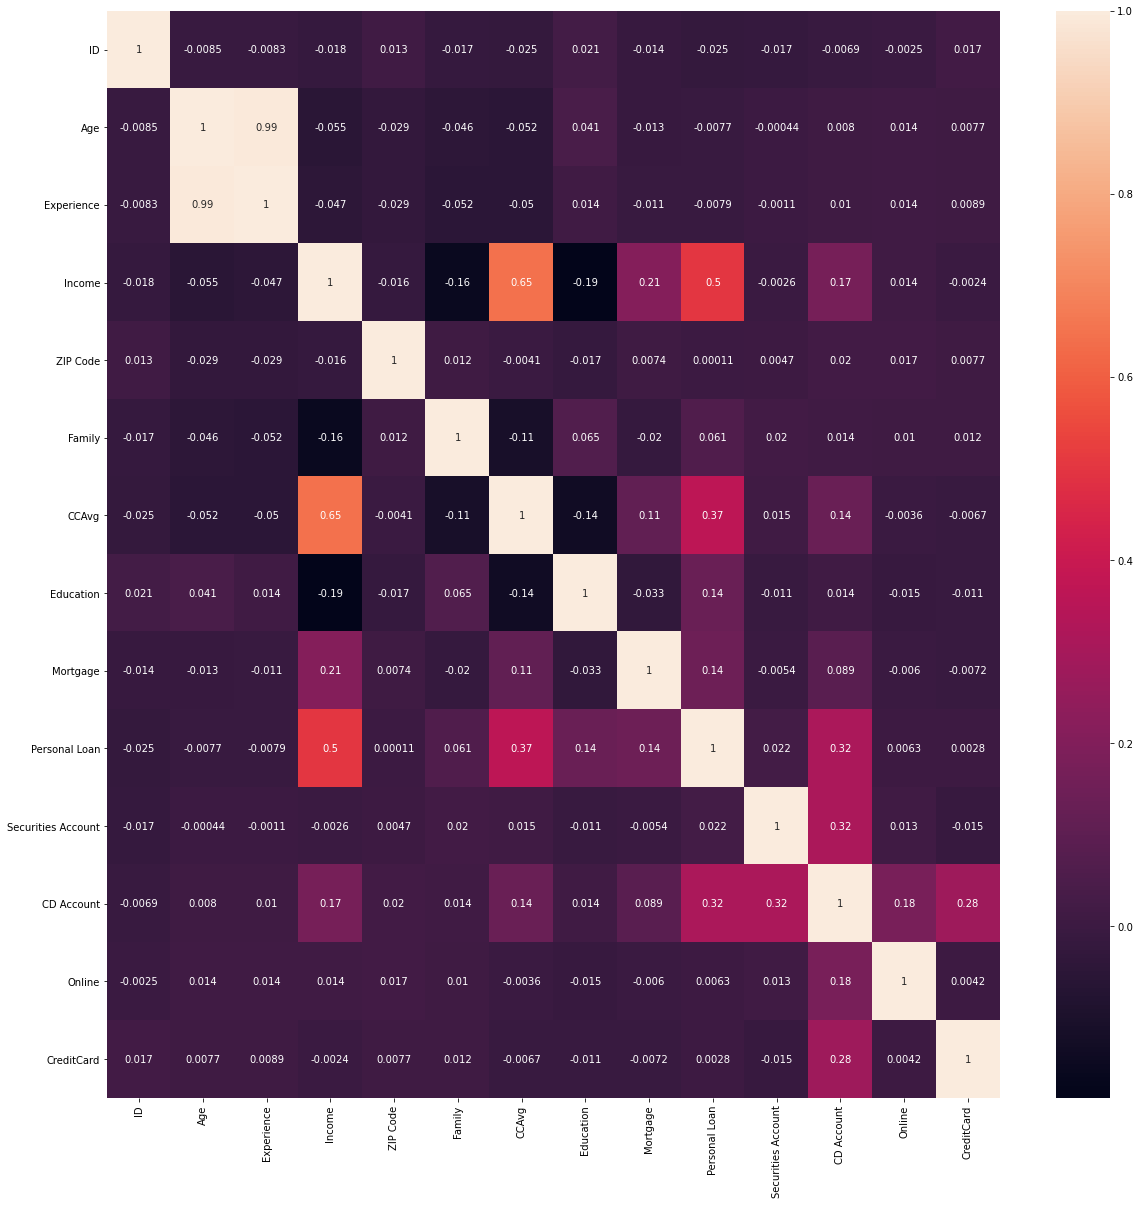

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

Personal loan has a positive relationship with income, and a slightly positive relationship with CCAvg and CD Account

## Split the data

In [32]:
Y = data['Personal Loan']
X = data.drop(['ID','Personal Loan'], axis=1)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.60,1,0,1,0,0,0
1,45,19,34,90089,3,1.50,1,0,1,0,0,0
2,39,15,11,94720,1,1.00,1,0,0,0,0,0
3,35,9,100,94112,1,2.70,2,0,0,0,0,0
4,35,8,45,91330,4,1.00,2,0,0,0,0,1


In [28]:
#Splitting the data into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

## Logistic Regression

In [29]:
#Fitting the model on train and predicting on test
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:
#Metrics reflecting model performance
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
print('Model accuracy was: ',accuracy_score(y_test,y_pred))
print('Model recall was: ',recall_score(y_test,y_pred))
print('Model precision was: ',precision_score(y_test,y_pred))
print('Model f1 score was: ',f1_score(y_test,y_pred))
print('Model roc_auc score was: ',roc_auc_score(y_test,y_pred))

Model accuracy was:  0.9073333333333333
Model recall was:  0.28859060402684567
Model precision was:  0.5657894736842105
Model f1 score was:  0.38222222222222224
Model roc_auc score was:  0.632082126587812


Model has high accuracy but lacks strong recall and f1 scores. The weak recall score demonstrates that it did not correctly identify a large proportion of true positives, and the f1 score is probably a result of the recall score

<AxesSubplot:>

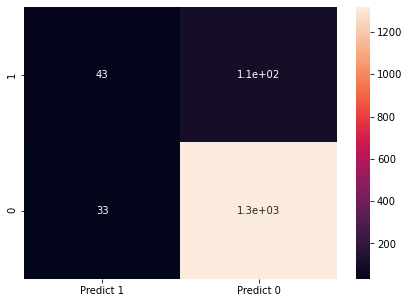

In [31]:
cm = confusion_matrix(y_test,y_pred,labels=[1,0])
cm_df = pd.DataFrame(cm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(cm_df, annot=True)

TP: 43
TN: 133
FP: 32
FN: 112

In [45]:
model.coef_[0]

array([-4.82316765e-04, -2.27946664e-03,  3.60873407e-02, -6.57021126e-05,
        1.51539677e-02,  9.44679398e-03,  1.64344279e-02,  8.33230099e-04,
        5.33930536e-04,  4.67755692e-03, -1.76545262e-04, -6.67846996e-05])

In [49]:
co_df = pd.DataFrame()
co_df['attr'] = X_train.columns
co_df['Coeff'] = np.round(abs(model.coef_[0]),2)
co_df.sort_values(by='Coeff',ascending=False)

,attr,Coeff
2,Income,0.04
4,Family,0.02
6,Education,0.02
5,CCAvg,0.01
0,Age,0.00
1,Experience,0.00
3,ZIP Code,0.00
7,Mortgage,0.00
8,Securities Account,0.00
9,CD Account,0.00


These coefficients make it seem like the only attribute that matters even slightly is income, with family size, education level, and credit card spending all contributing as well. Similar observations were made on the correlation heatmap.

In [70]:
#Print all rows where the predicted class was not equal to the observed class
test_data = pd.DataFrame()
test_data['Actual'] = y_test.values
test_data['Predicted'] = y_pred
for row in test_data.itertuples():
    if row.Actual != row.Predicted:
        print(row)

Pandas(Index=40, Actual=0, Predicted=1)
Pandas(Index=44, Actual=1, Predicted=0)
Pandas(Index=48, Actual=1, Predicted=0)
Pandas(Index=51, Actual=1, Predicted=0)
Pandas(Index=94, Actual=1, Predicted=0)
Pandas(Index=102, Actual=1, Predicted=0)
Pandas(Index=107, Actual=1, Predicted=0)
Pandas(Index=118, Actual=1, Predicted=0)
Pandas(Index=138, Actual=0, Predicted=1)
Pandas(Index=147, Actual=0, Predicted=1)
Pandas(Index=173, Actual=1, Predicted=0)
Pandas(Index=174, Actual=1, Predicted=0)
Pandas(Index=200, Actual=0, Predicted=1)
Pandas(Index=208, Actual=1, Predicted=0)
Pandas(Index=215, Actual=0, Predicted=1)
Pandas(Index=226, Actual=0, Predicted=1)
Pandas(Index=227, Actual=0, Predicted=1)
Pandas(Index=231, Actual=1, Predicted=0)
Pandas(Index=238, Actual=1, Predicted=0)
Pandas(Index=247, Actual=1, Predicted=0)
Pandas(Index=250, Actual=0, Predicted=1)
Pandas(Index=266, Actual=1, Predicted=0)
Pandas(Index=269, Actual=1, Predicted=0)
Pandas(Index=272, Actual=1, Predicted=0)
Pandas(Index=284, Act

# Conclusion

##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted that the personal loan would be accepted and was accepted

*False Positive (observed=0,predicted=1):*

Predicted that the personal loan would be accepted and was not accepted

*True Negative (observed=0,predicted=0):*

Predicted that the personal loan would not be accepted and was not accepted

*False Negative (observed=1,predicted=0):*

Predicted that the personal loan would not be accepted and was accepted

##### `Important Features`

Only Income, family size, education level, and credit card average had coefficients above 0, with Income having the highest coefficient.

#### `Important Metric`

The most important thing to minimize is the number of False Negatives, or people that would accept a loan when the model would have predicted they wouldn't. This is because the bank makes more money if more people are accepting the loan and not losing money if they are offering the loan and it is denied(The case of False Positives). So the most important metric would be **recall** or sensitivity

Given that the recall score of this model was so low, I would suggest running the campaign again, targeting people with higher income as it was the attribute that was most highly correlated with accepting a personal loan, and then using the data from that campaign to build a more accurate model.